In [63]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df=pd.read_csv('advertising.csv',index_col=[0])

In [65]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [67]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

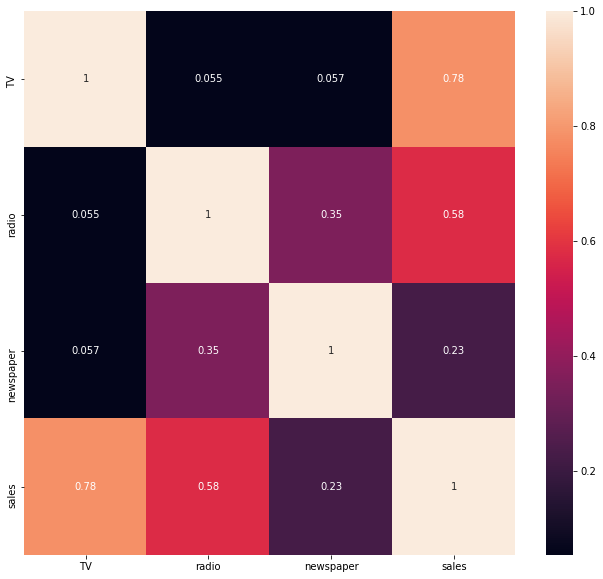

In [68]:
plt.figure(figsize=(11,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

no Multi colinearity in the dataset

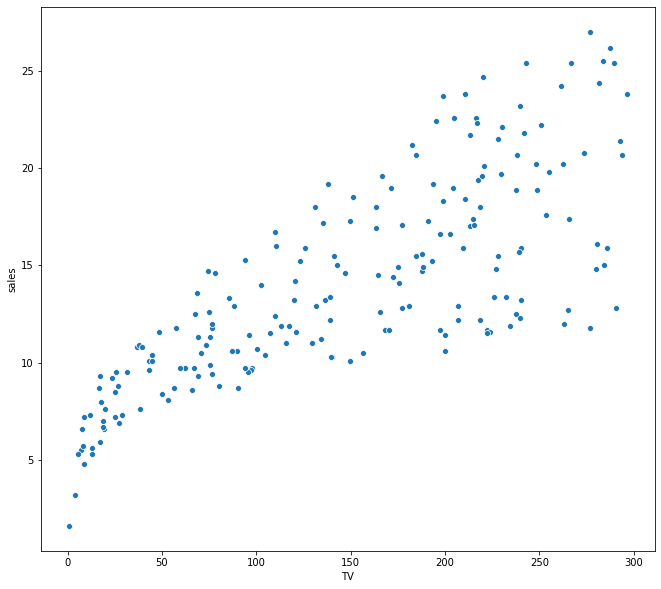

In [69]:
plt.figure(figsize=(11,10))
sns.scatterplot(data=df, x=df['TV'],y=df['sales'])
plt.show()

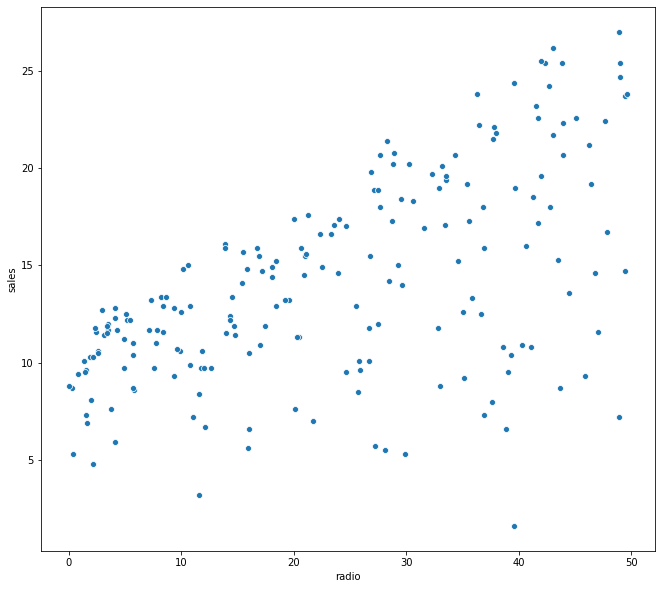

In [70]:
plt.figure(figsize=(11,10))
sns.scatterplot(data=df, x=df['radio'],y=df['sales'])
plt.show()

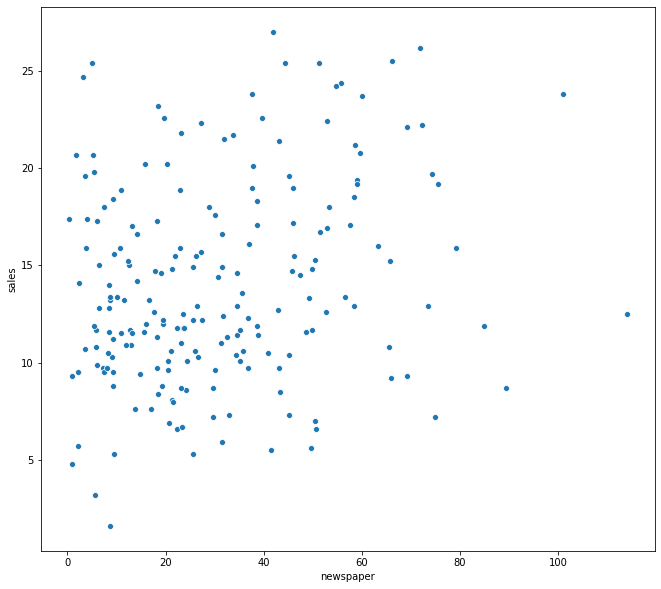

In [71]:
plt.figure(figsize=(11,10))
sns.scatterplot(data=df, x=df['newspaper'],y=df['sales'])
plt.show()

As the data is linear in nature will go fo the Linear regression

In [72]:
from scipy.stats import skew

-0.06932836662244649


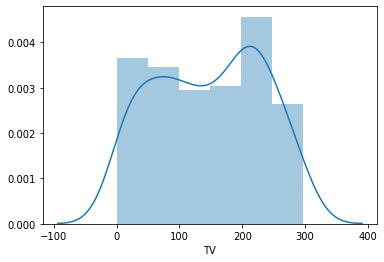

------------------------------------------------
0.0934668451108453


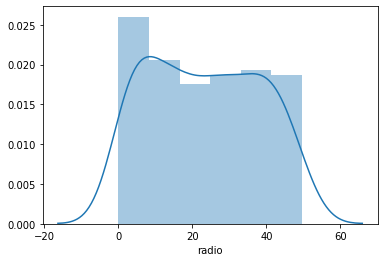

------------------------------------------------
0.8879959753085498


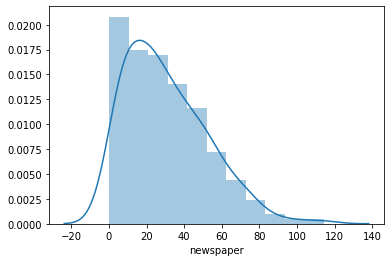

------------------------------------------------
0.4045082487061191


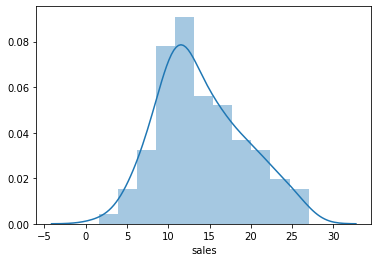

------------------------------------------------


In [73]:
for col in df:
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.show()
    print('------------------------------------------------')

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [82]:
x=df[['TV']]
y=df['sales']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [85]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("solpe : ",lr.coef_)
print("Intercept : ",lr.intercept_)


solpe :  [0.04767145]
Intercept :  6.97283247565991


In [86]:
from sklearn.metrics import r2_score, mean_squared_error

In [87]:
print('r2_score : ',r2_score(y_test,y_hat))
print('mean_squared_error : ',mean_squared_error(y_test,y_hat))

r2_score :  0.6245878256025158
mean_squared_error :  9.796188813568767


In [88]:
residuals=y_test-y_hat

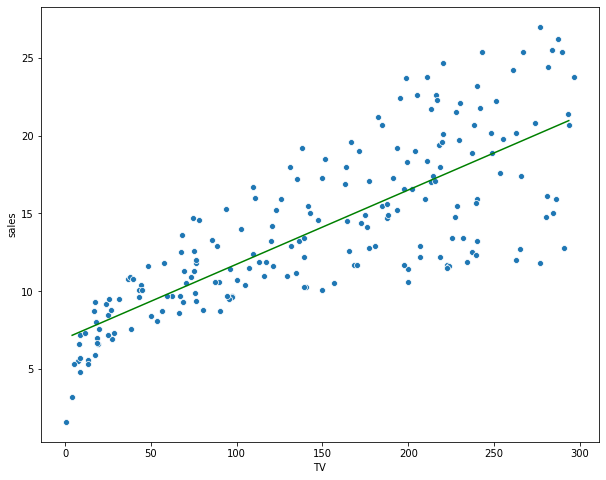

In [91]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x=df['TV'],y=df['sales'])
sns.lineplot(x_test['TV'].to_list(),y_hat, color='green')
plt.show()

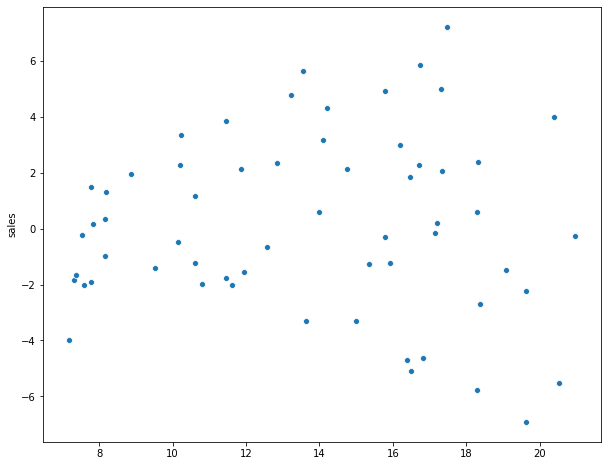

In [92]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_hat,residuals)
plt.show()

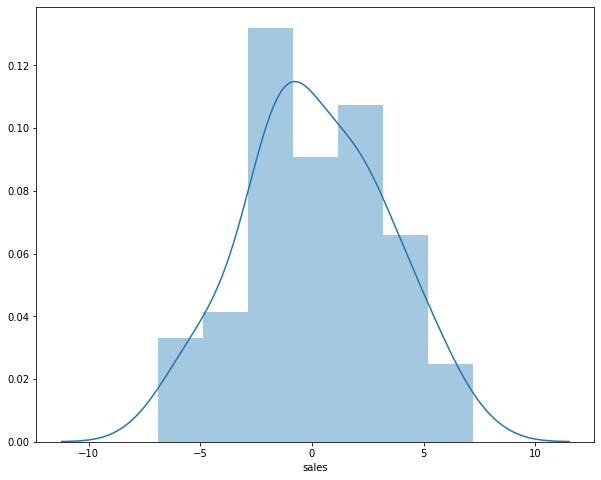

In [95]:
plt.figure(figsize=(10,8))
sns.distplot(residuals)
plt.show()

Multiple linear regression

In [96]:
x=df.drop('sales',axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_test)
print("solpe : ",lr.coef_)
print("Intercept : ",lr.intercept_)
print('r2_score : ',r2_score(y_test,y_hat))
print('mean_squared_error : ',mean_squared_error(y_test,y_hat))

solpe :  [0.0481289  0.17796339 0.00139448]
Intercept :  2.6813190513800773
r2_score :  0.8838601866443507
mean_squared_error :  2.991122500457477


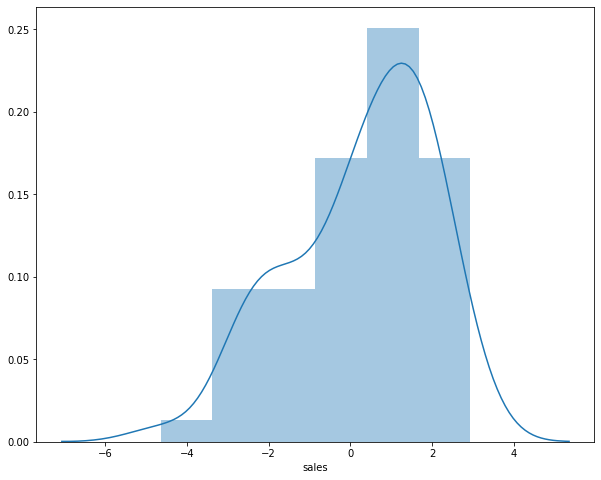

In [97]:
residuals=y_test-y_hat
plt.figure(figsize=(10,8))
sns.distplot(residuals)
plt.show()

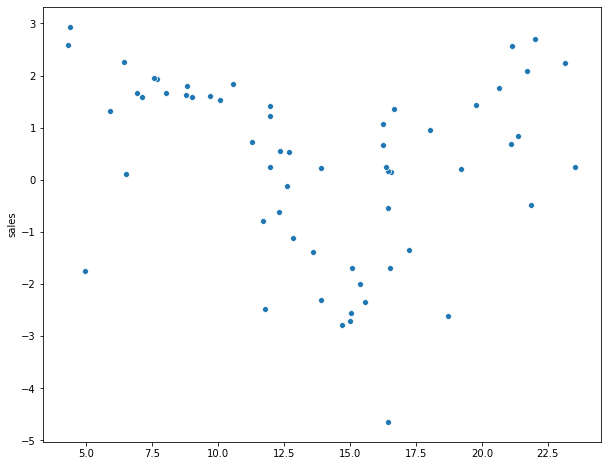

In [98]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_hat,residuals)
plt.show()

slope=[0.0439973  0.18853996 0.00351698]
intercept=3.2089387358742805
MSE=2.954649458172495
R2_score=0.8805709510520728
RSS=177.2789674903497


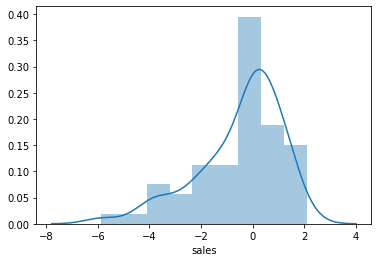

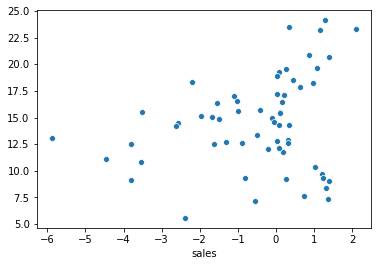

In [100]:
# so this is a case 1 
x=df[["TV","radio","newspaper"]]
y=df["sales"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("slope={}".format(lr.coef_))
print("intercept={}".format(lr.intercept_))
y_hat=lr.predict(x_test)
print("MSE={}".format(mean_squared_error(y_test,y_hat)))
print("R2_score={}".format(r2_score(y_test,y_hat)))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
sns.distplot(residuals)
plt.show()
sns.scatterplot(residuals,y_hat)
plt.show()

case2 x1=TV,x2=radio

slope=[0.04679887 0.18356253]
intercept=2.8161764057819383
MSE=1.8523749832500553
R2_score=0.9234672717046994
RSS=111.14249899500332
RSS=111.14249899500332


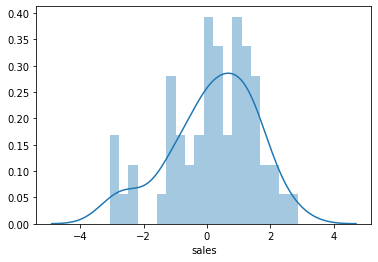

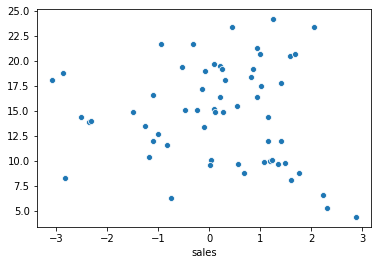

In [101]:
print("case2 x1=TV,x2=radio")
print()
x=df[["TV","radio"]]
y=df["sales"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("slope={}".format(lr.coef_))
print("intercept={}".format(lr.intercept_))
y_hat=lr.predict(x_test)
print("MSE={}".format(mean_squared_error(y_test,y_hat)))
print("R2_score={}".format(r2_score(y_test,y_hat)))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
sns.distplot(residuals,bins=20)
plt.show()
sns.scatterplot(residuals,y_hat)
plt.show()

case3 x1=TV,x2=newspaper

slope=[0.04801877 0.04041028]
intercept=5.714560936670086
MSE=10.649650091552296
R2_score=0.48657930823075946
RSS=638.9790054931377
RSS=638.9790054931377


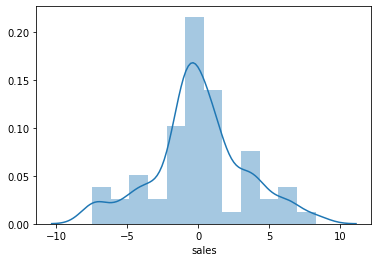

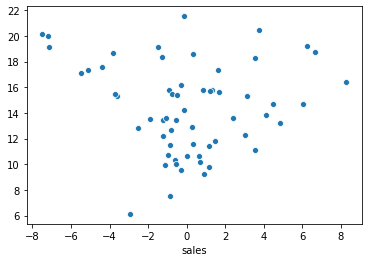

In [102]:
print("case3 x1=TV,x2=newspaper")
print()
x=df[["TV","newspaper"]]
y=df["sales"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("slope={}".format(lr.coef_))
print("intercept={}".format(lr.intercept_))
y_hat=lr.predict(x_test)
print("MSE={}".format(mean_squared_error(y_test,y_hat)))
print("R2_score={}".format(r2_score(y_test,y_hat)))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
sns.distplot(residuals)
plt.show()
sns.scatterplot(residuals,y_hat)
plt.show()

case4 x1=newspsper,x2=radio

slope=[0.02259563 0.19834626]
intercept=8.875496685437511
MSE=18.497502872065056
R2_score=0.23422133094850928
RSS=1109.8501723239033
RSS=1109.8501723239033


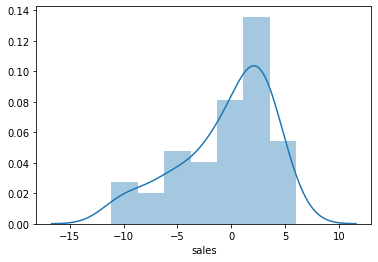

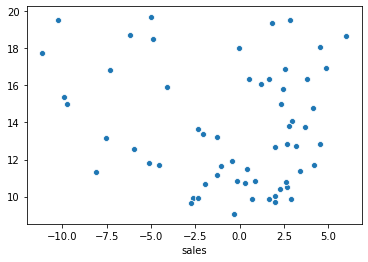

In [103]:
print("case4 x1=newspsper,x2=radio")
print()
x=df[["newspaper","radio"]]
y=df["sales"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("slope={}".format(lr.coef_))
print("intercept={}".format(lr.intercept_))
y_hat=lr.predict(x_test)
print("MSE={}".format(mean_squared_error(y_test,y_hat)))
print("R2_score={}".format(r2_score(y_test,y_hat)))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
sns.distplot(residuals)
plt.show()
sns.scatterplot(residuals,y_hat)
plt.show()

so none of the case is giving good results and only 2 contitions satisfies so we will go with the polynomial regression

In [104]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(4)
x_poly=pf.fit_transform(x)
x_poly

array([[1.00000000e+00, 6.92000000e+01, 3.78000000e+01, ...,
        6.84220038e+06, 3.73750252e+06, 2.04158375e+06],
       [1.00000000e+00, 4.51000000e+01, 3.93000000e+01, ...,
        3.14150810e+06, 2.73750041e+06, 2.38544936e+06],
       [1.00000000e+00, 6.93000000e+01, 4.59000000e+01, ...,
        1.01179340e+07, 6.70148872e+06, 4.43864838e+06],
       ...,
       [1.00000000e+00, 6.40000000e+00, 9.30000000e+00, ...,
        3.54263040e+03, 5.14788480e+03, 7.48052010e+03],
       [1.00000000e+00, 6.62000000e+01, 4.20000000e+01, ...,
        7.73062416e+06, 4.90462560e+06, 3.11169600e+06],
       [1.00000000e+00, 8.70000000e+00, 8.60000000e+00, ...,
        5.59803240e+03, 5.53368720e+03, 5.47008160e+03]])

slope=[ 0.00000000e+00  4.36263082e-01  8.62050219e-01 -1.37604926e-02
 -3.91884065e-02 -1.51042472e-02  1.85439894e-04  4.77585959e-04
  1.31579727e-03 -4.54618302e-04 -9.04175744e-07  1.02509866e-07
 -1.27838208e-05 -6.71707359e-06  9.66141450e-06]
intercept=4.570352831611364
MSE=23.40141340180791
R2_score=0.21578456372498012
RSS=1404.0848041084746
RSS=1404.0848041084746


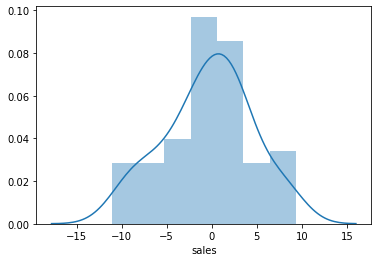

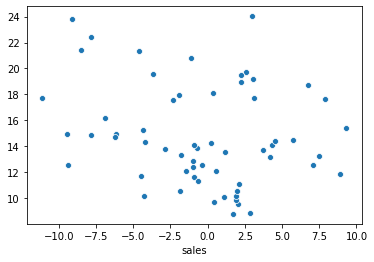

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_poly,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
print("slope={}".format(lr.coef_))
print("intercept={}".format(lr.intercept_))
y_hat=lr.predict(x_test)
print("MSE={}".format(mean_squared_error(y_test,y_hat)))
print("R2_score={}".format(r2_score(y_test,y_hat)))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
residuals=y_test-y_hat
rss=(residuals**2).sum()
print("RSS={}".format(rss))
sns.distplot(residuals)
plt.show()
sns.scatterplot(residuals,y_hat)
plt.show()

so in this scenerio we can conclude that the polynomial with degree 4 is the best model